# Q1: Bag of Words

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Importing the images and run the kmeans algorithm
	 importing: (31) inline_skate: . . . . 
	 importing: (64) joshua_tree: . . . . . . . 
	 importing: (86) kangaroo: . . . . . . . . . 
	 importing: (114) ketch: . . . . . . . . . . . . 
	 importing: (61) lamp: . . . . . . . 
	 importing: (81) laptop: . . . . . . . . . 
	 importing: (200) Leopards: . . . . . . . . . . . . . . . . . . . . 
	 importing: (78) llama: . . . . . . . . 
	 importing: (41) lobster: . . . . . 
	 importing: (66) lotus: . . . . . . . 
	 importing: (43) mandolin: . . . . . 
	 importing: (40) mayfly: . . . . 
	 importing: (87) menorah: . . . . . . . . . 
	 importing: (32) metronome: . . . . 
	 importing: (76) minaret: . . . . . . . . 
	 importing: (798) Motorbikes: . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
	 

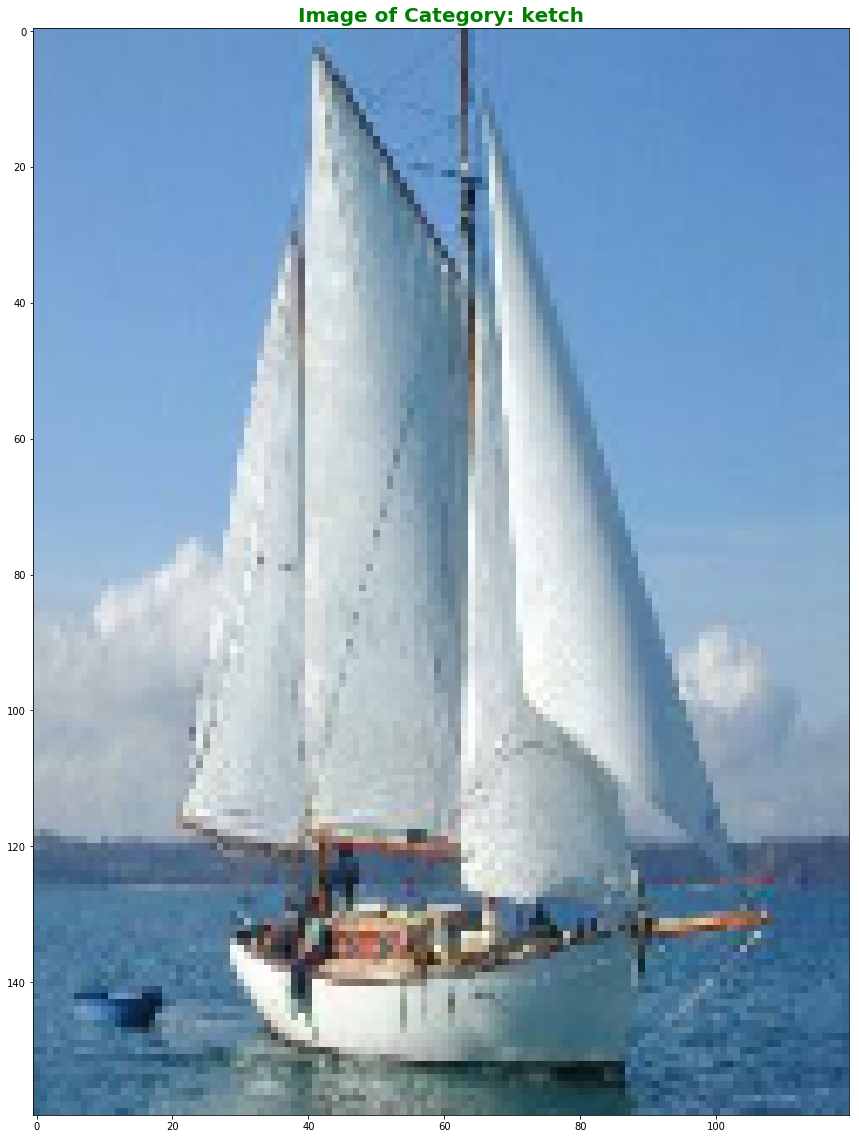

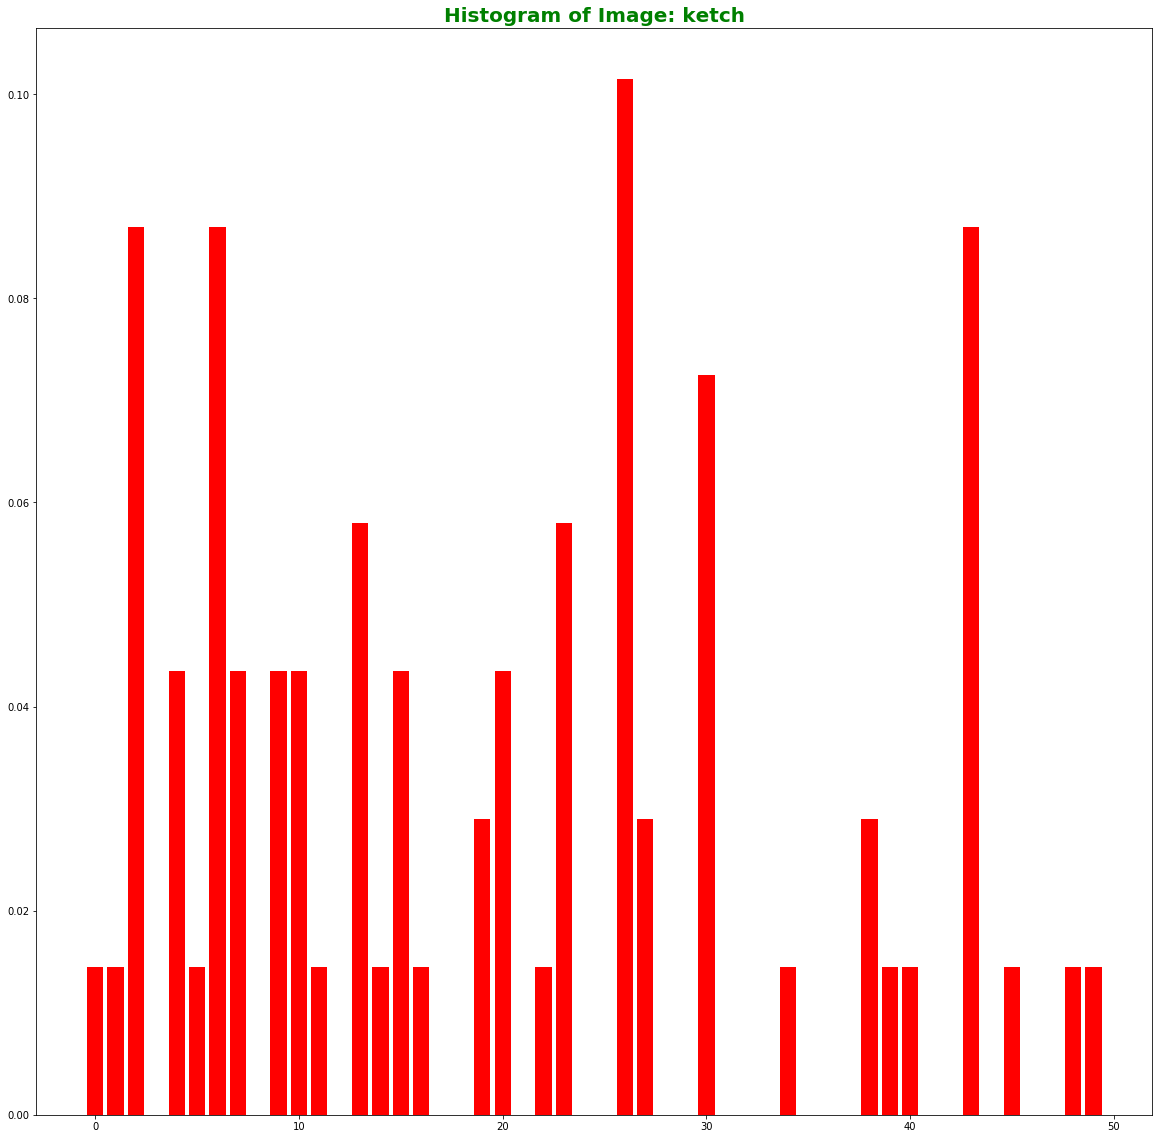

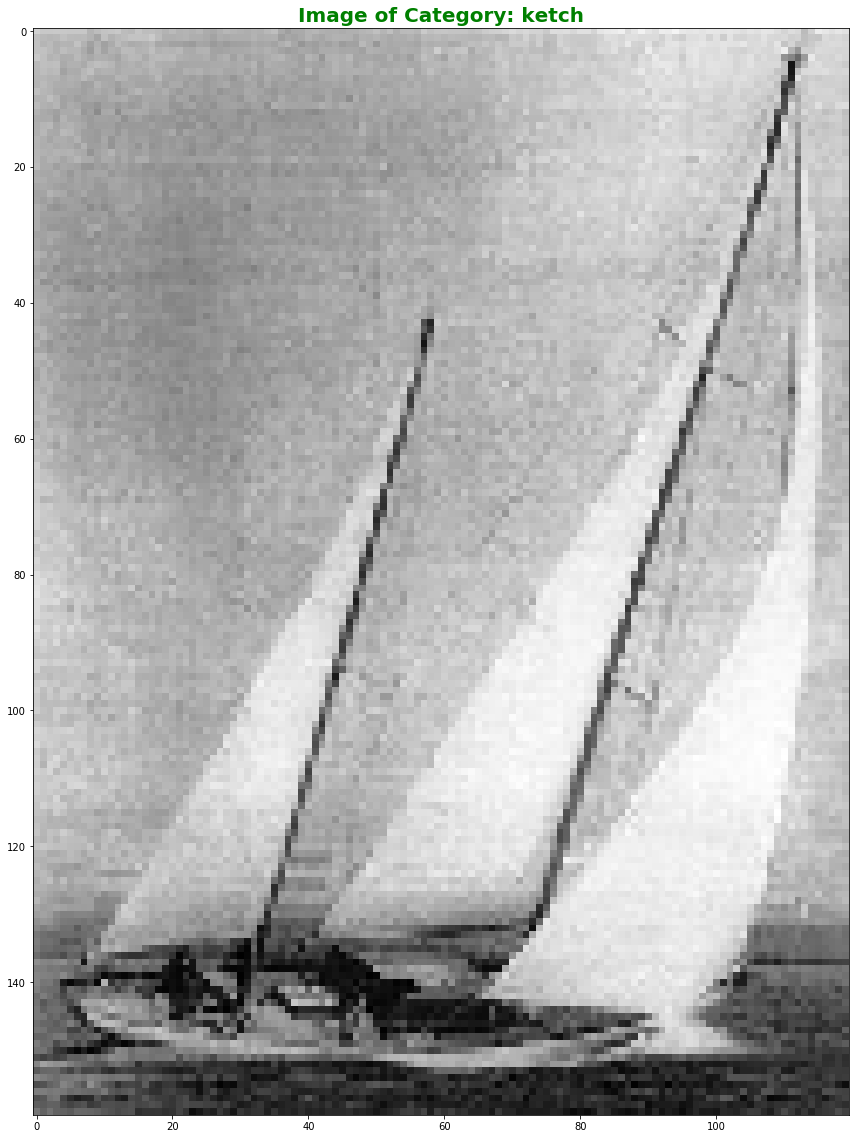

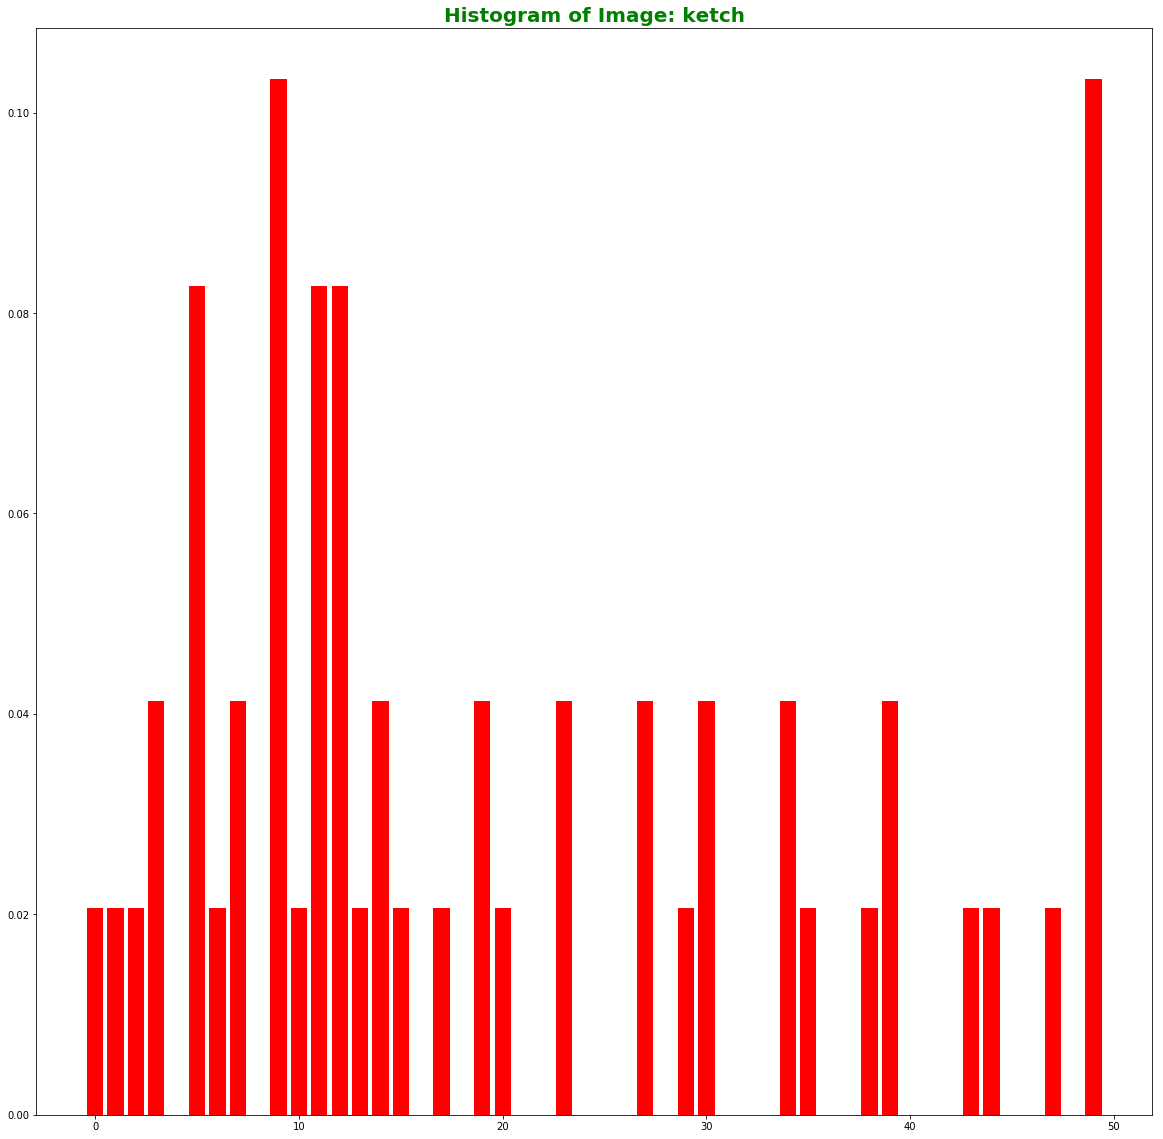

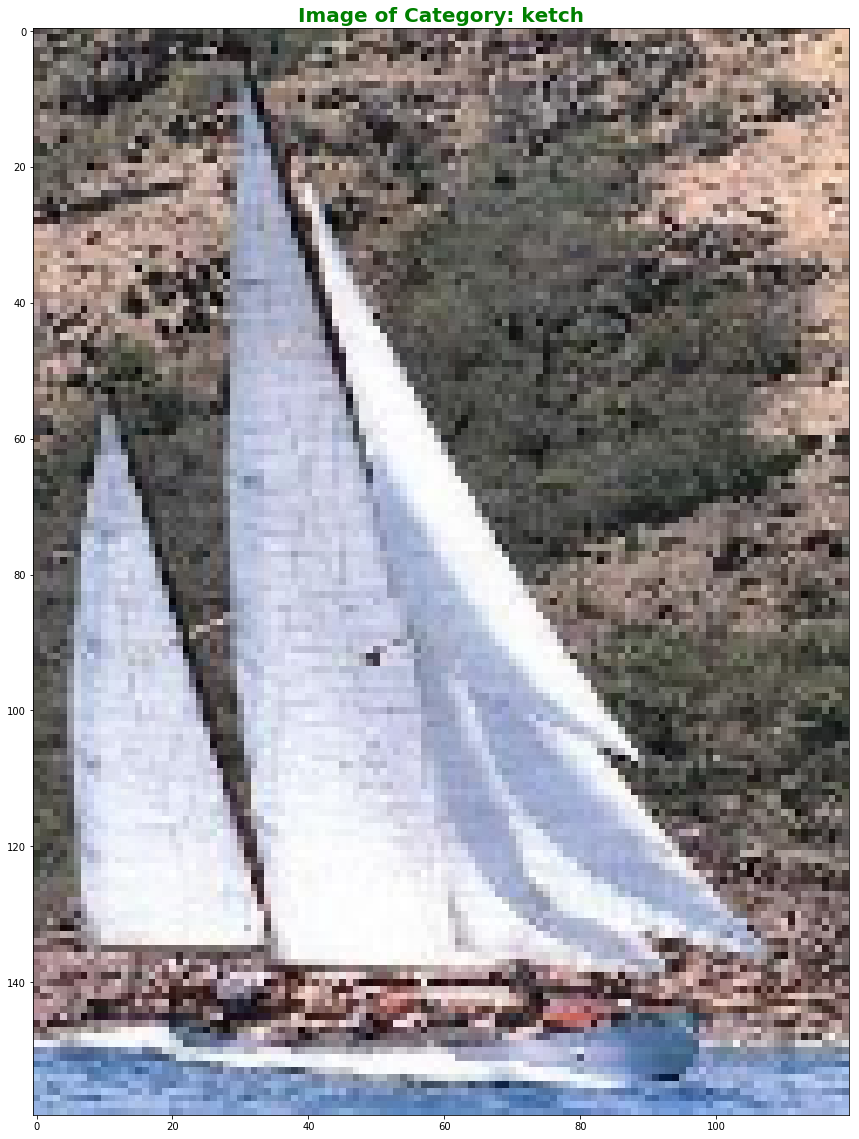

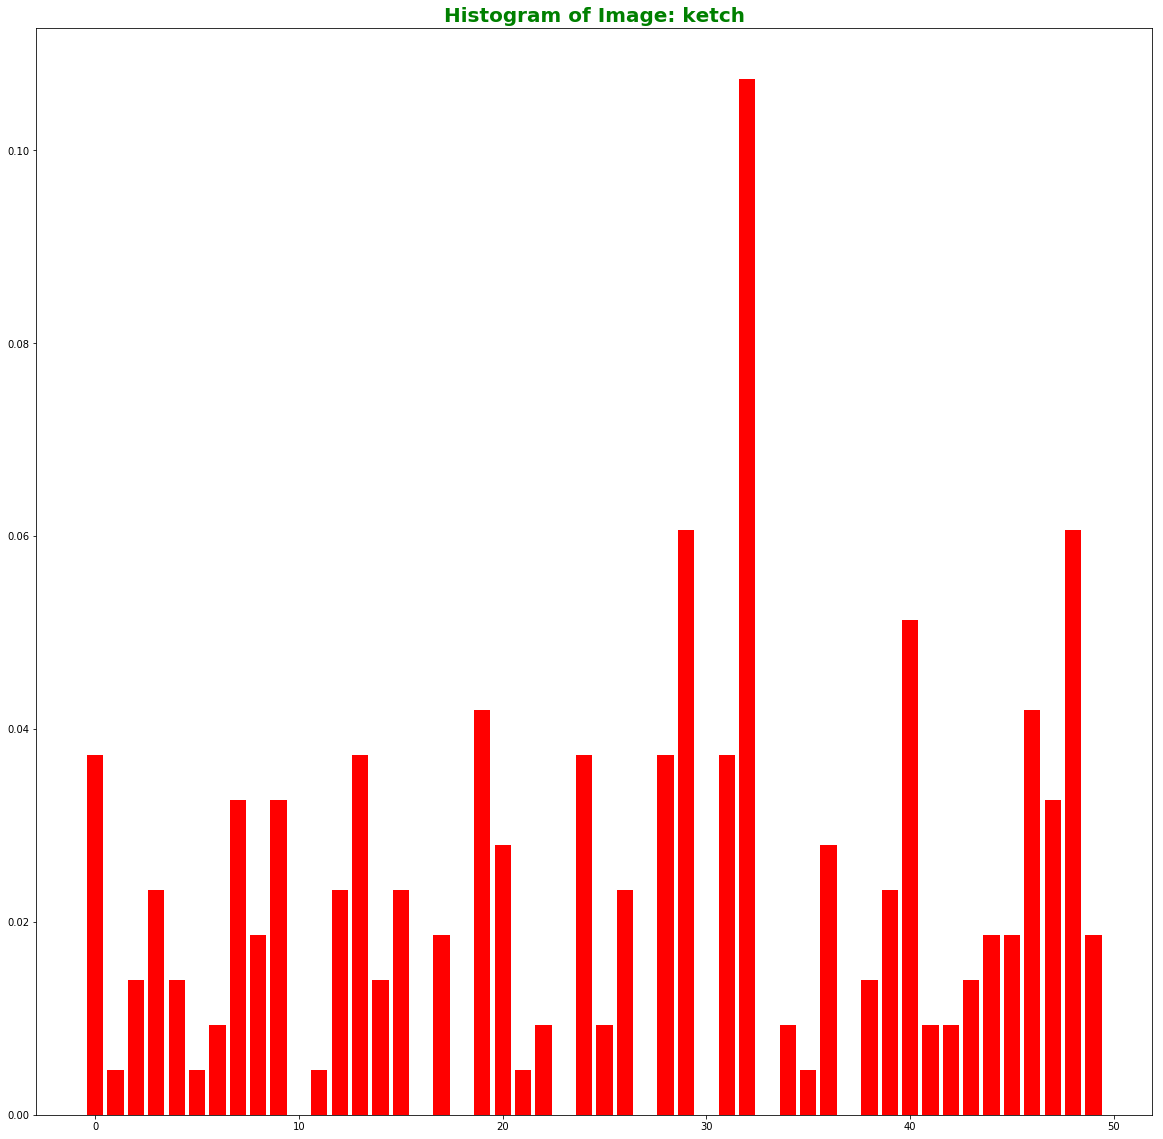

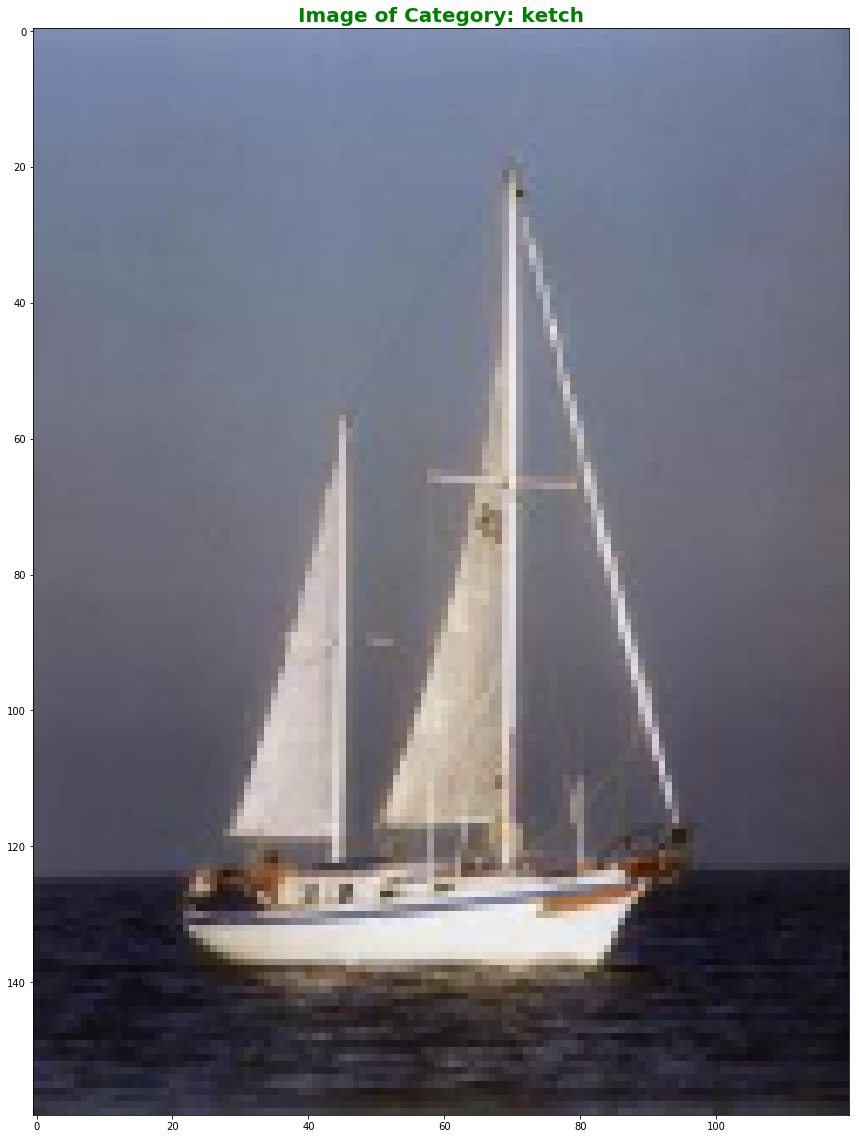

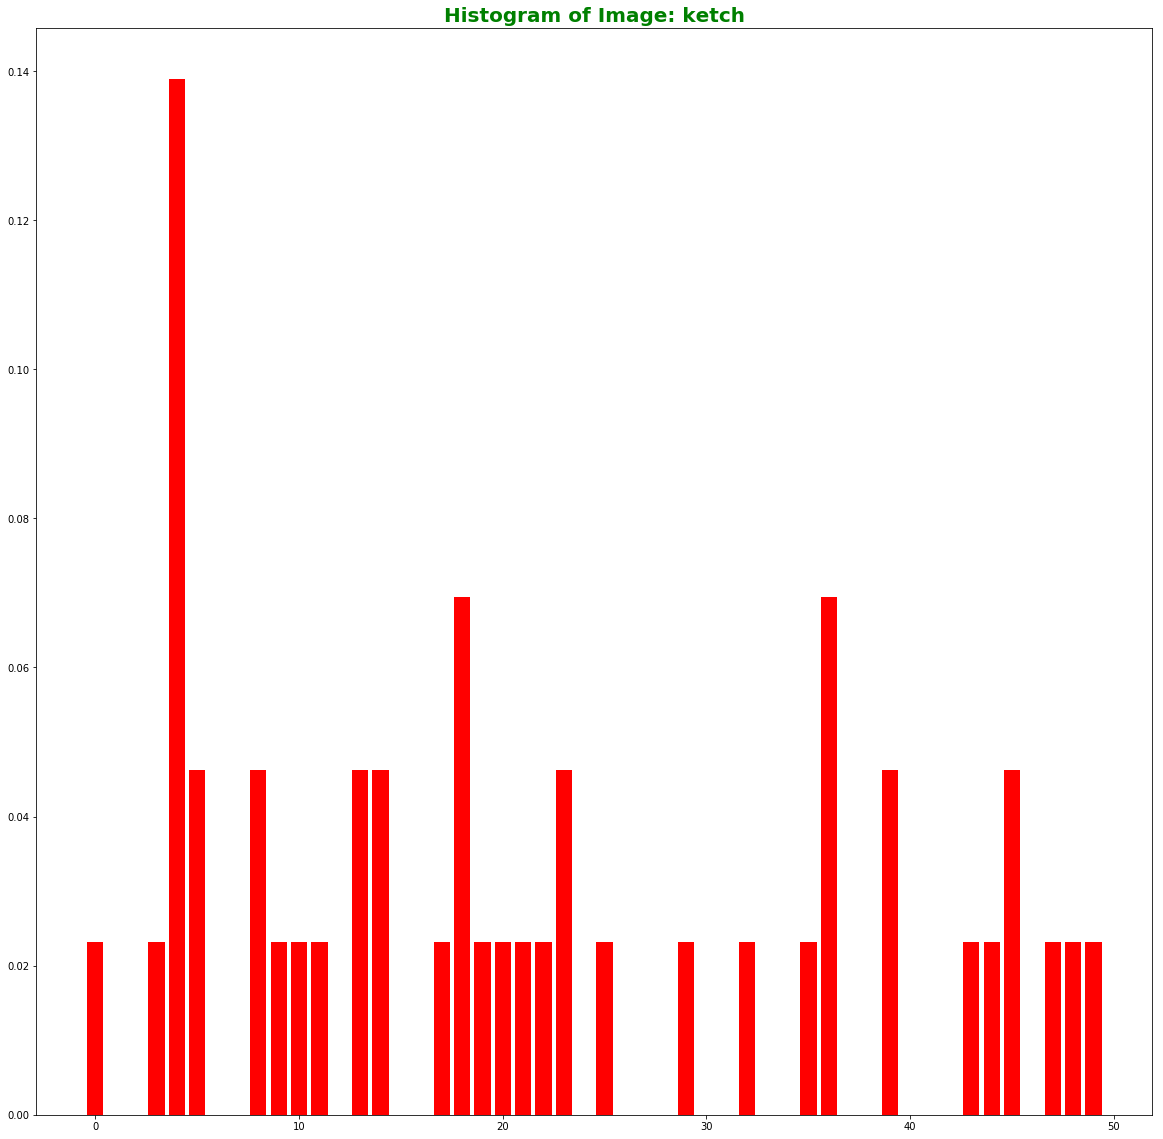

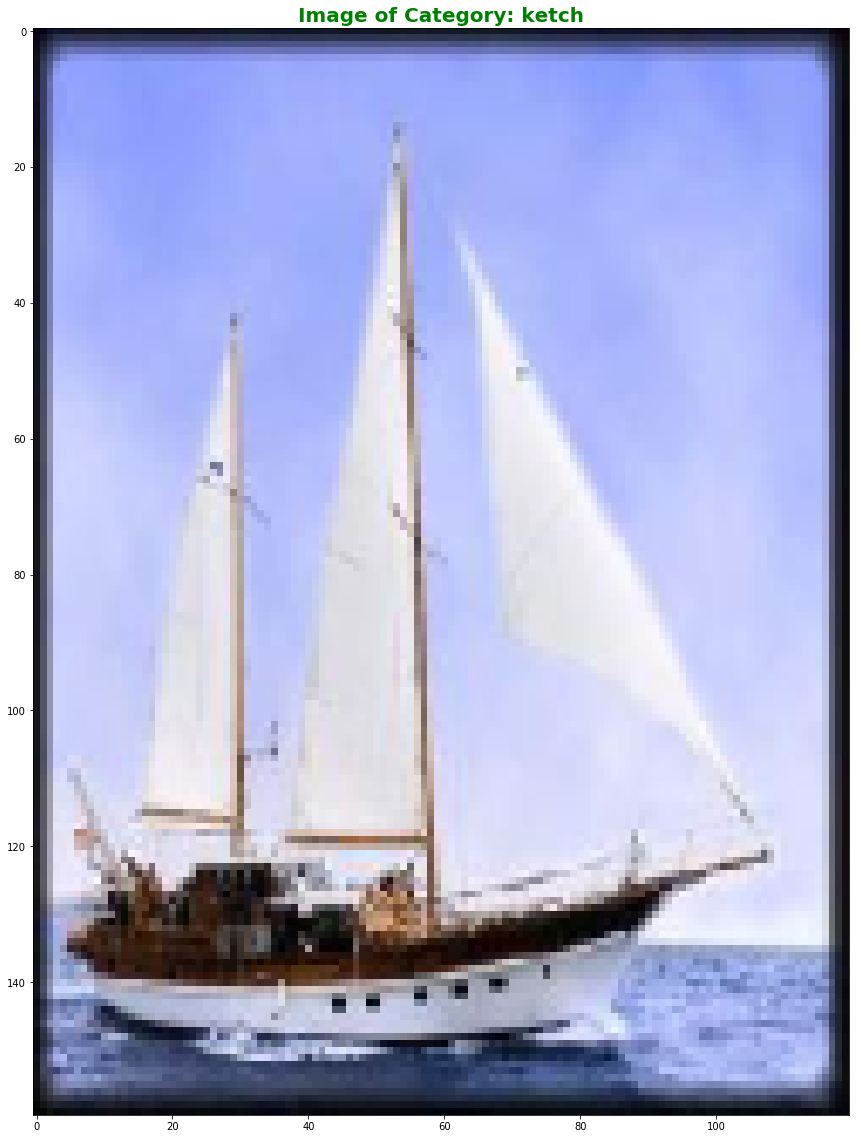

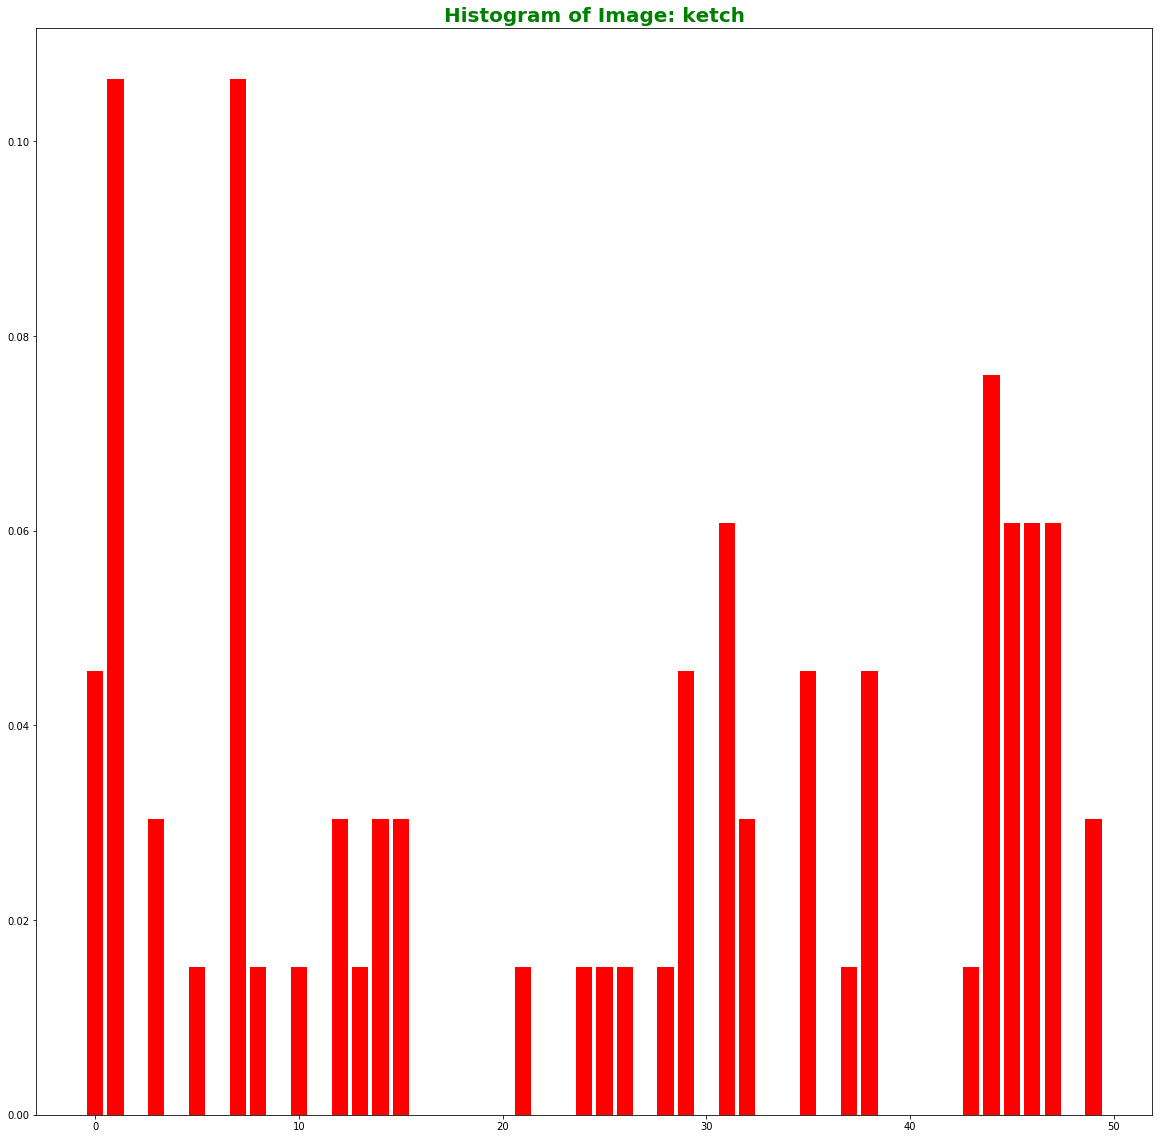

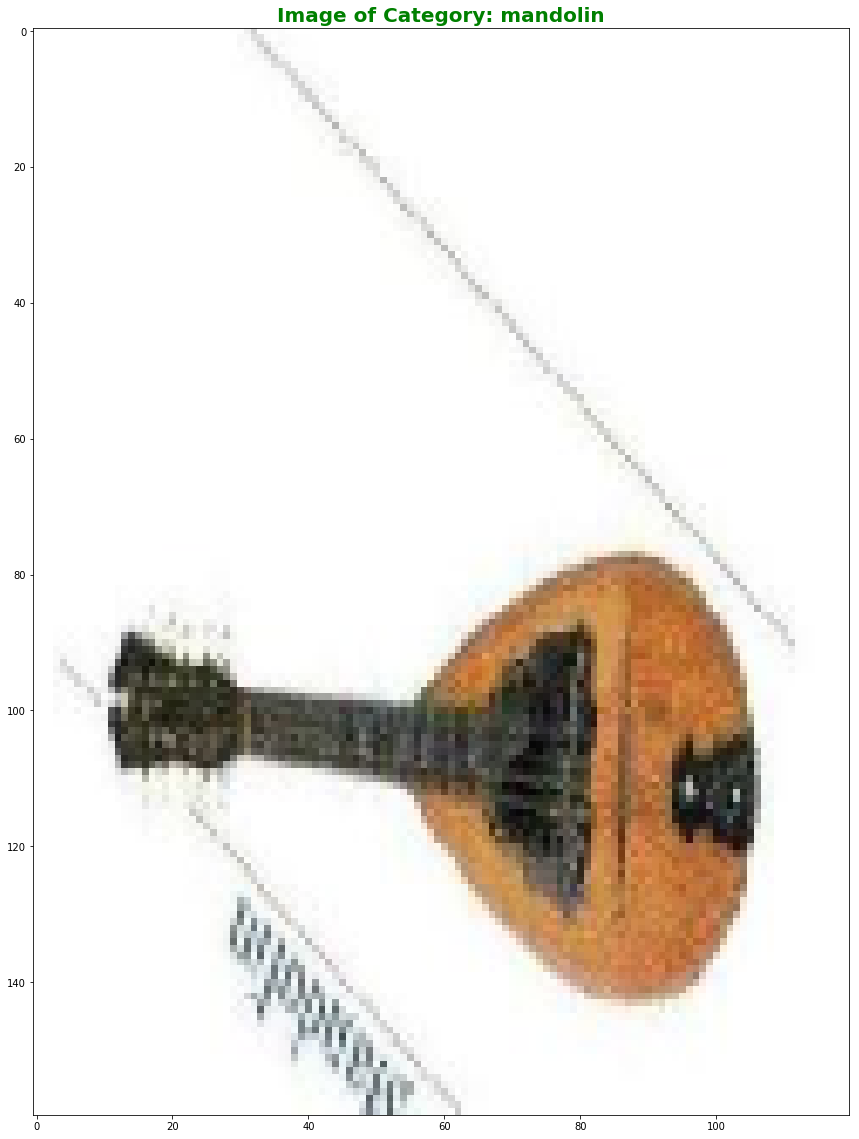

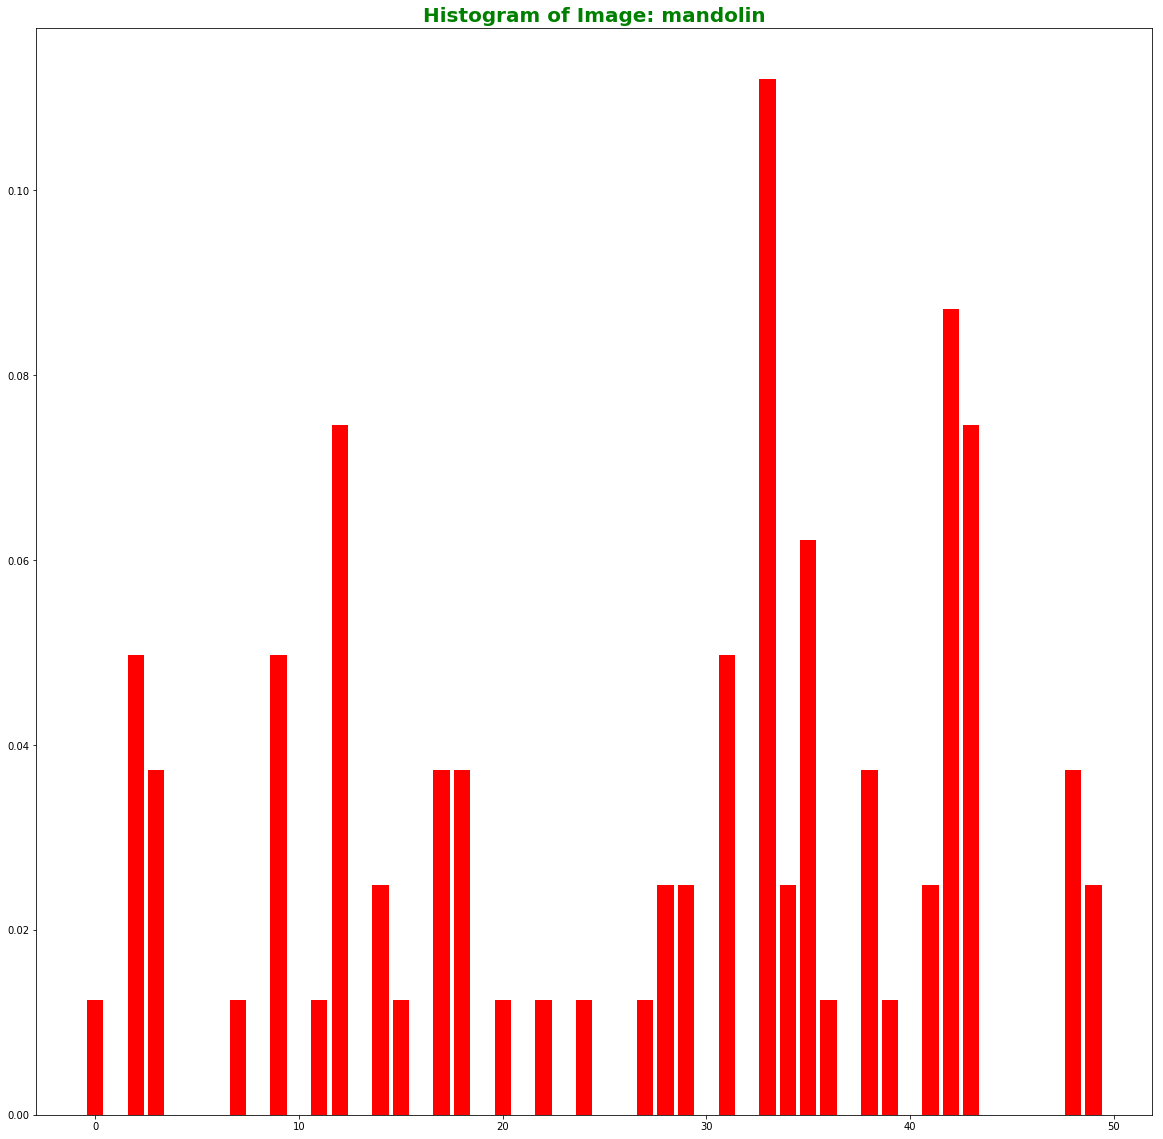

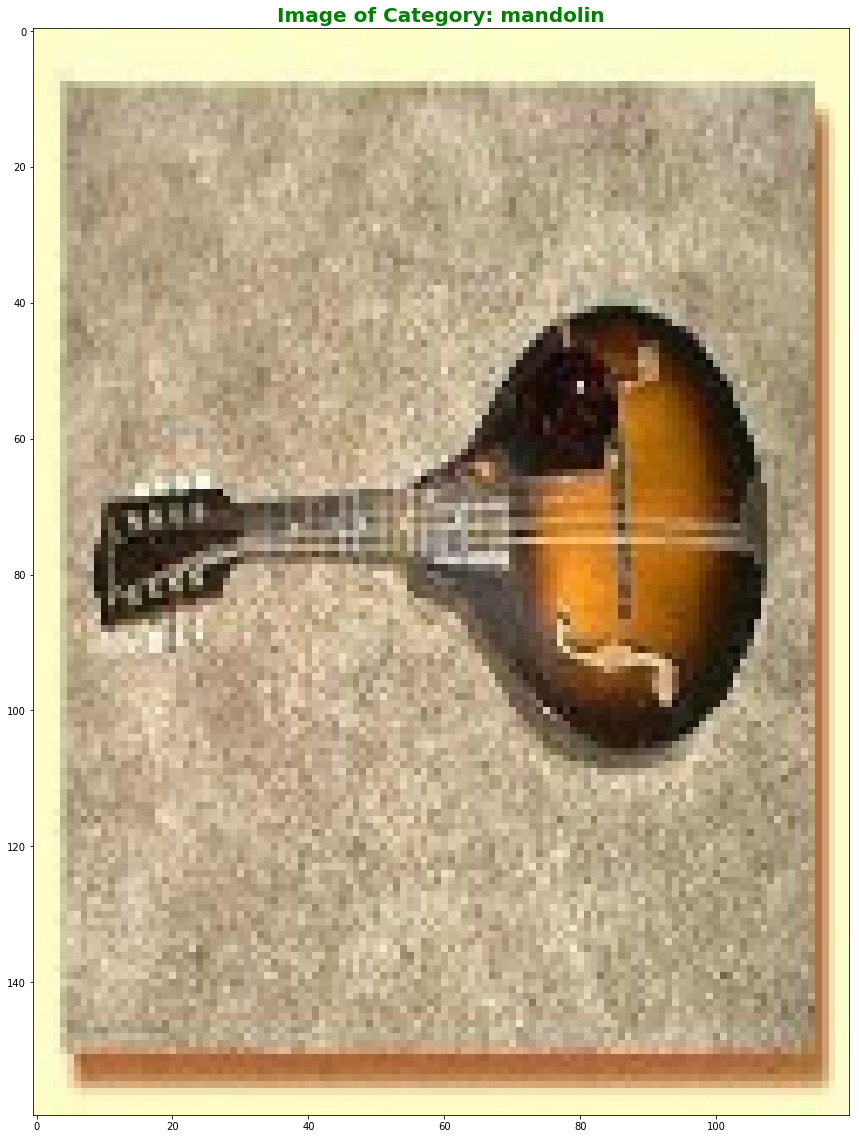

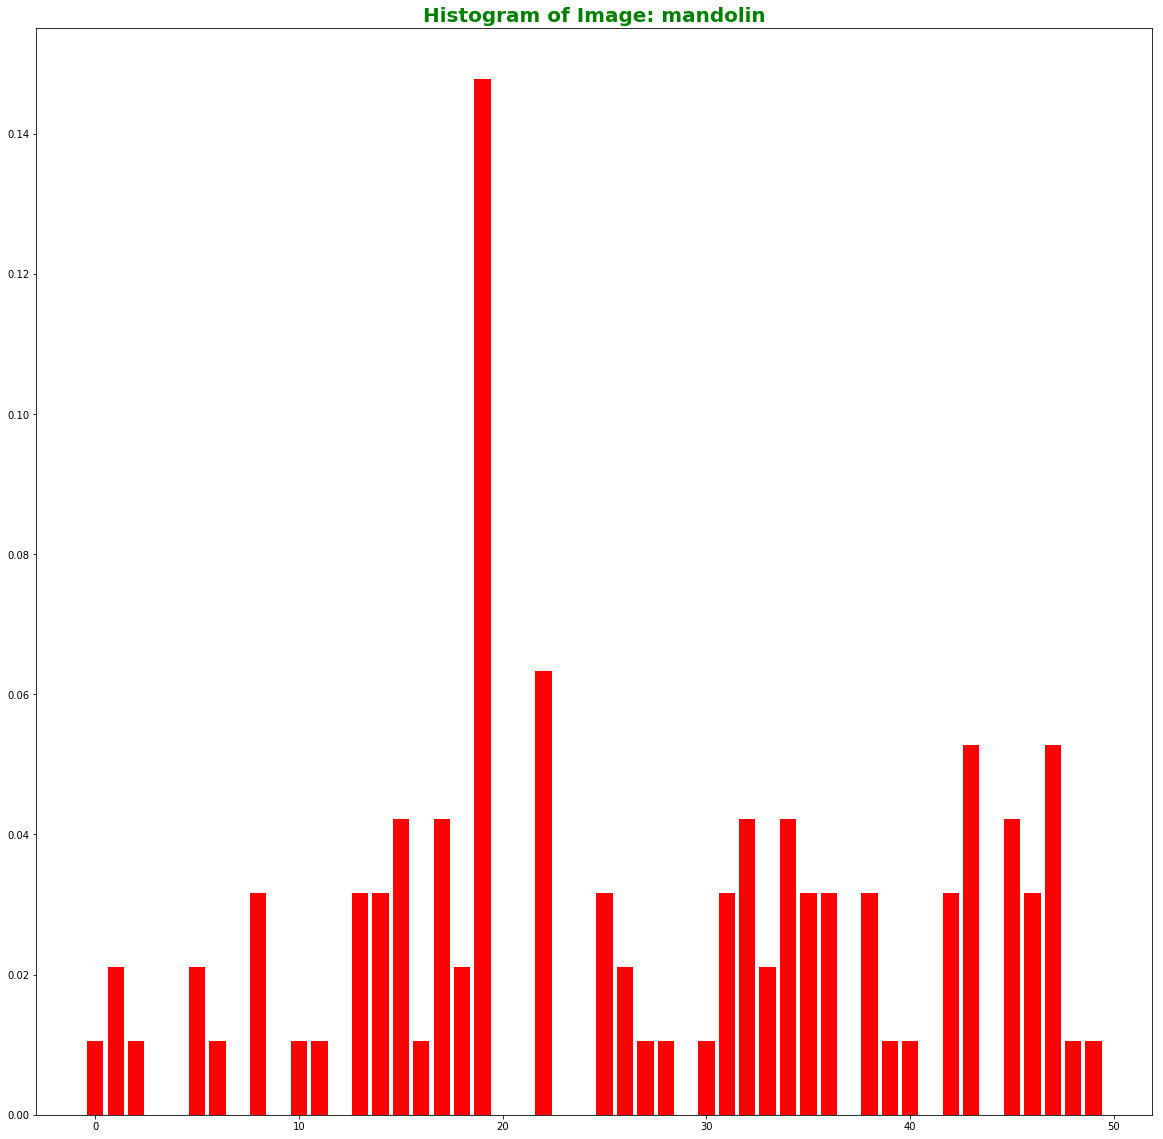

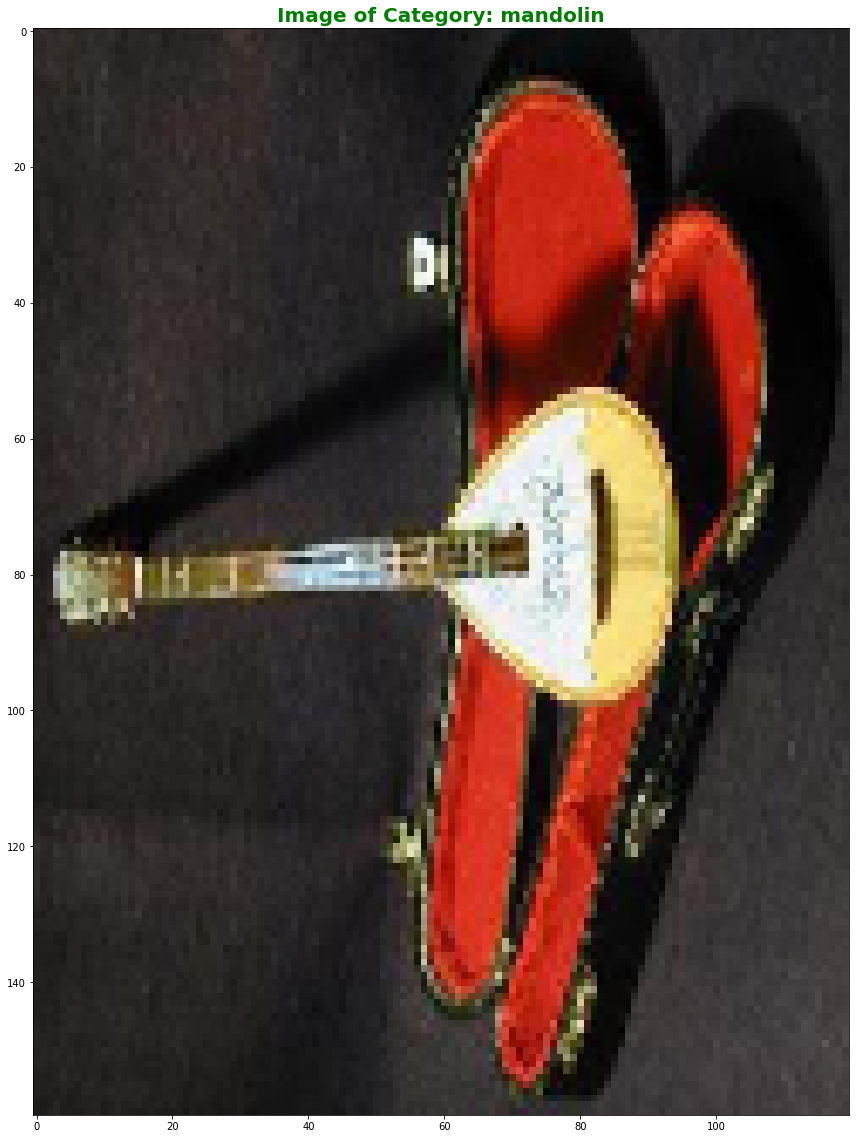

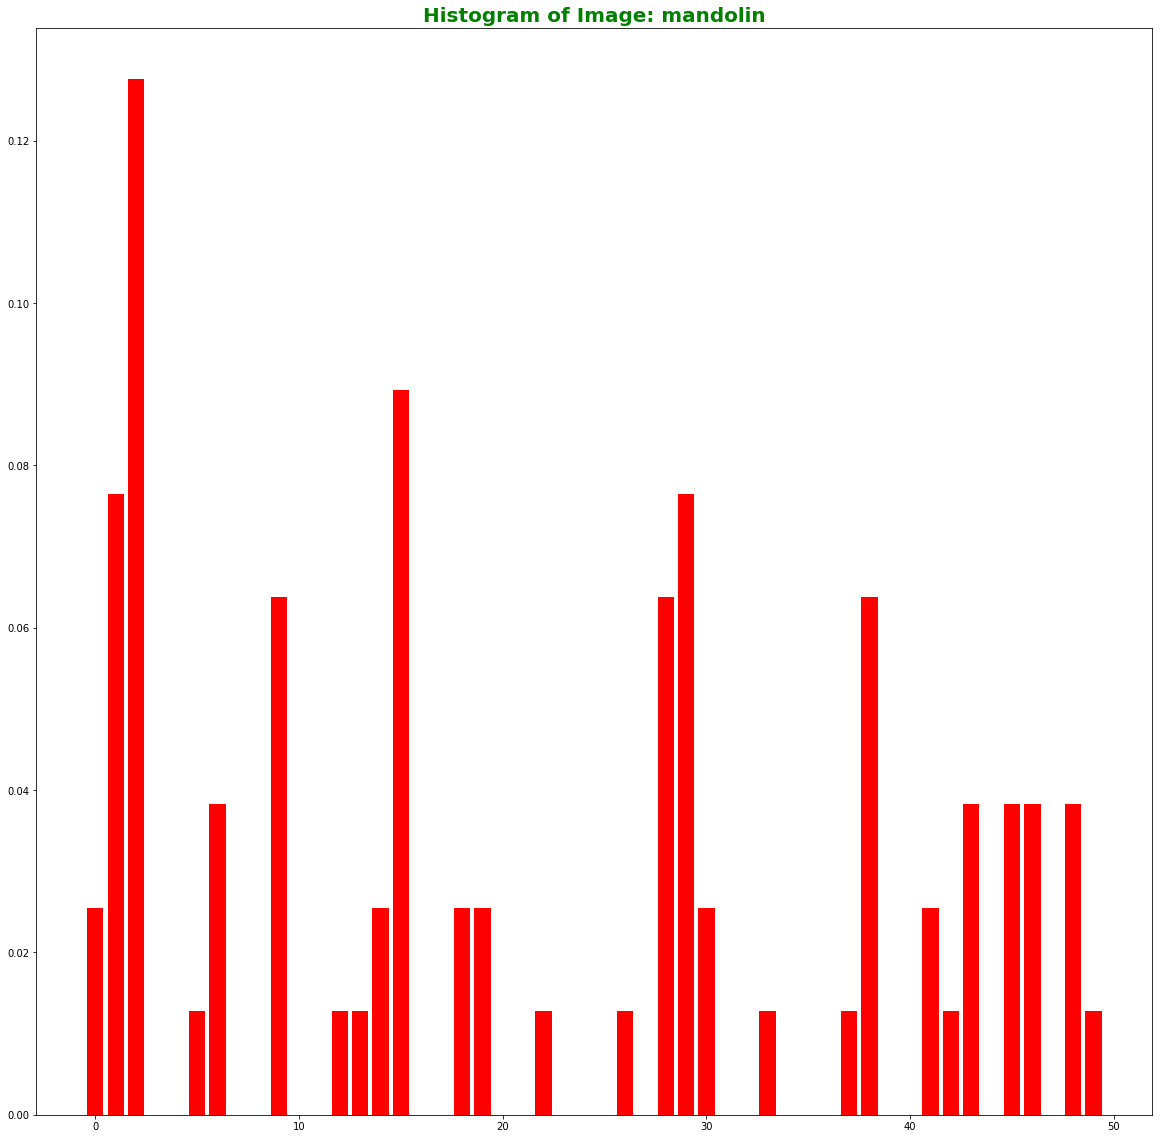

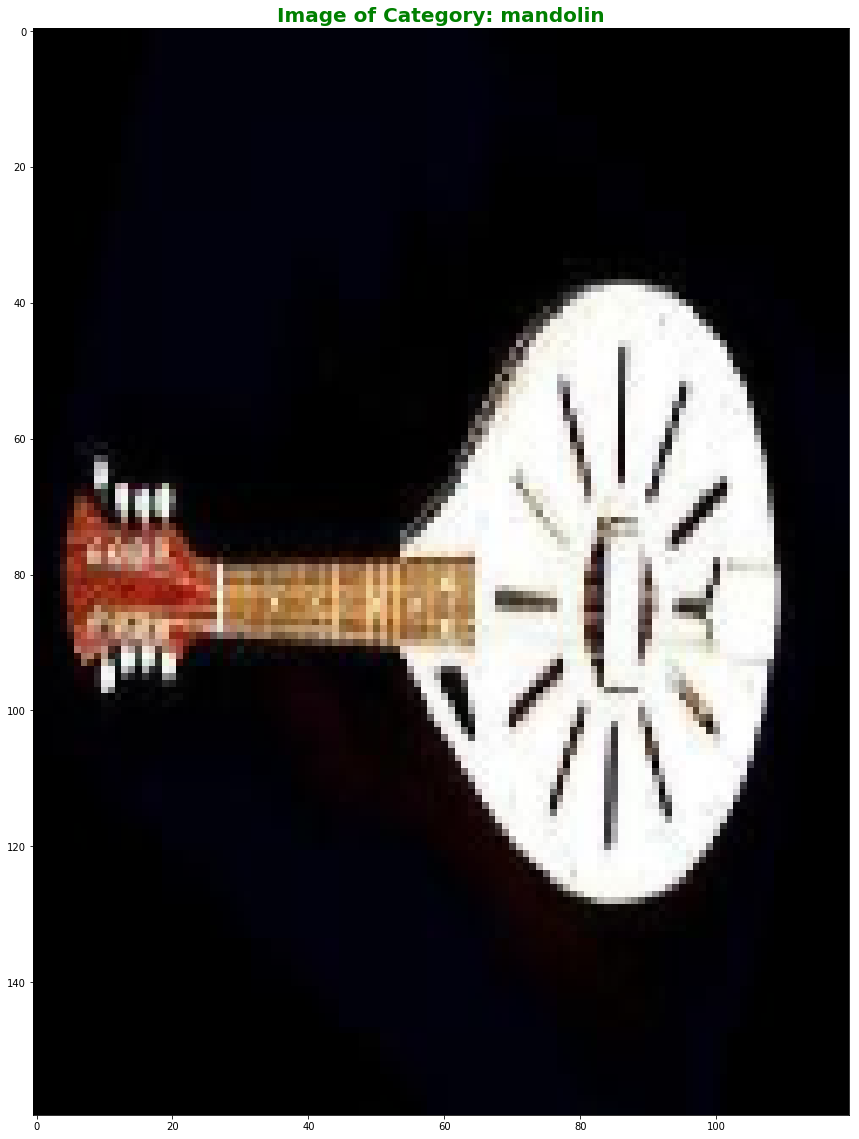

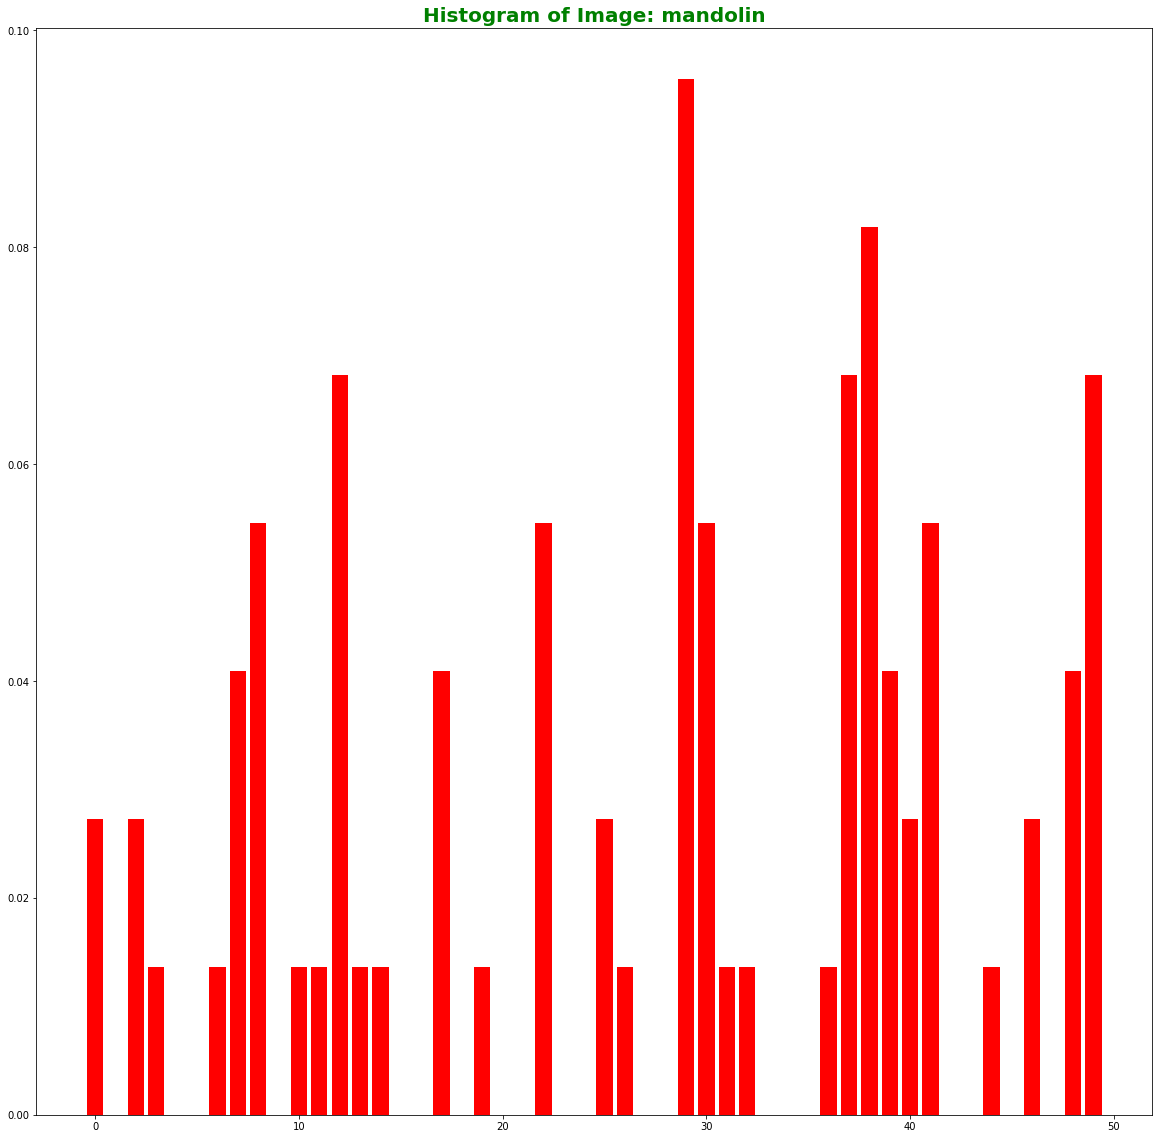

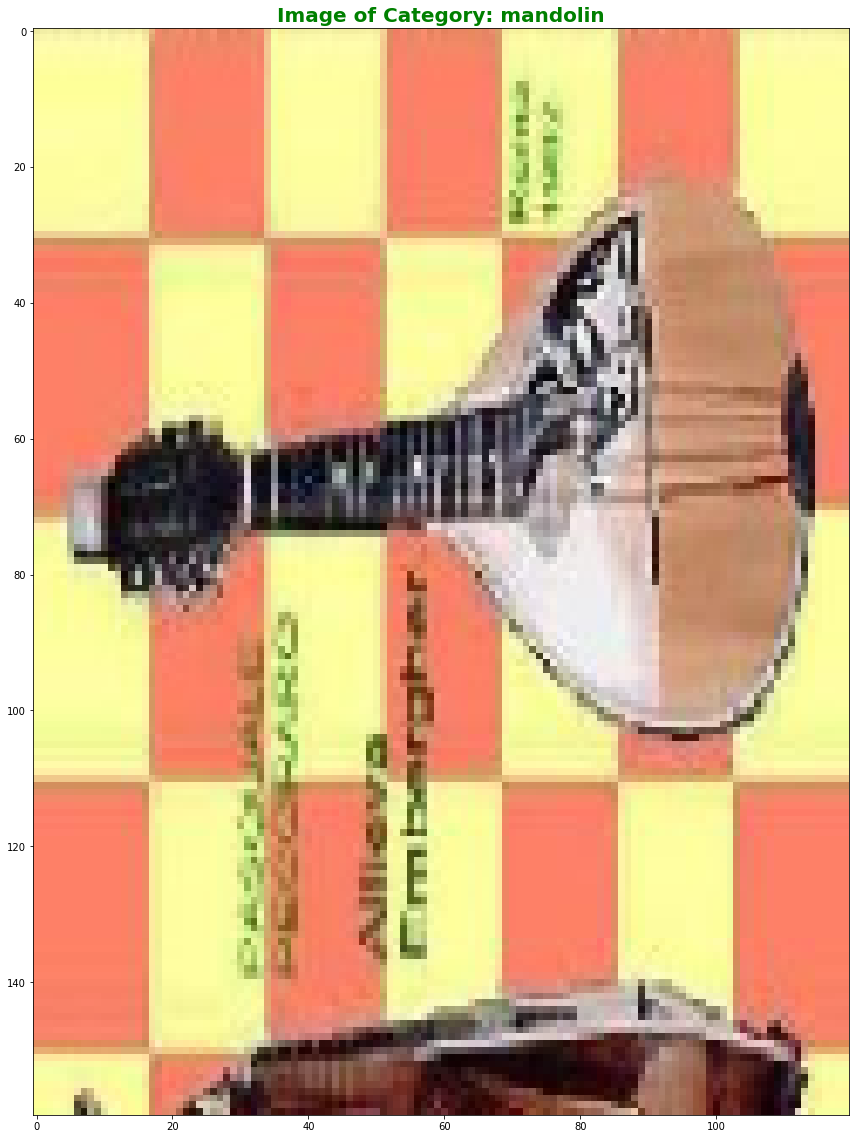

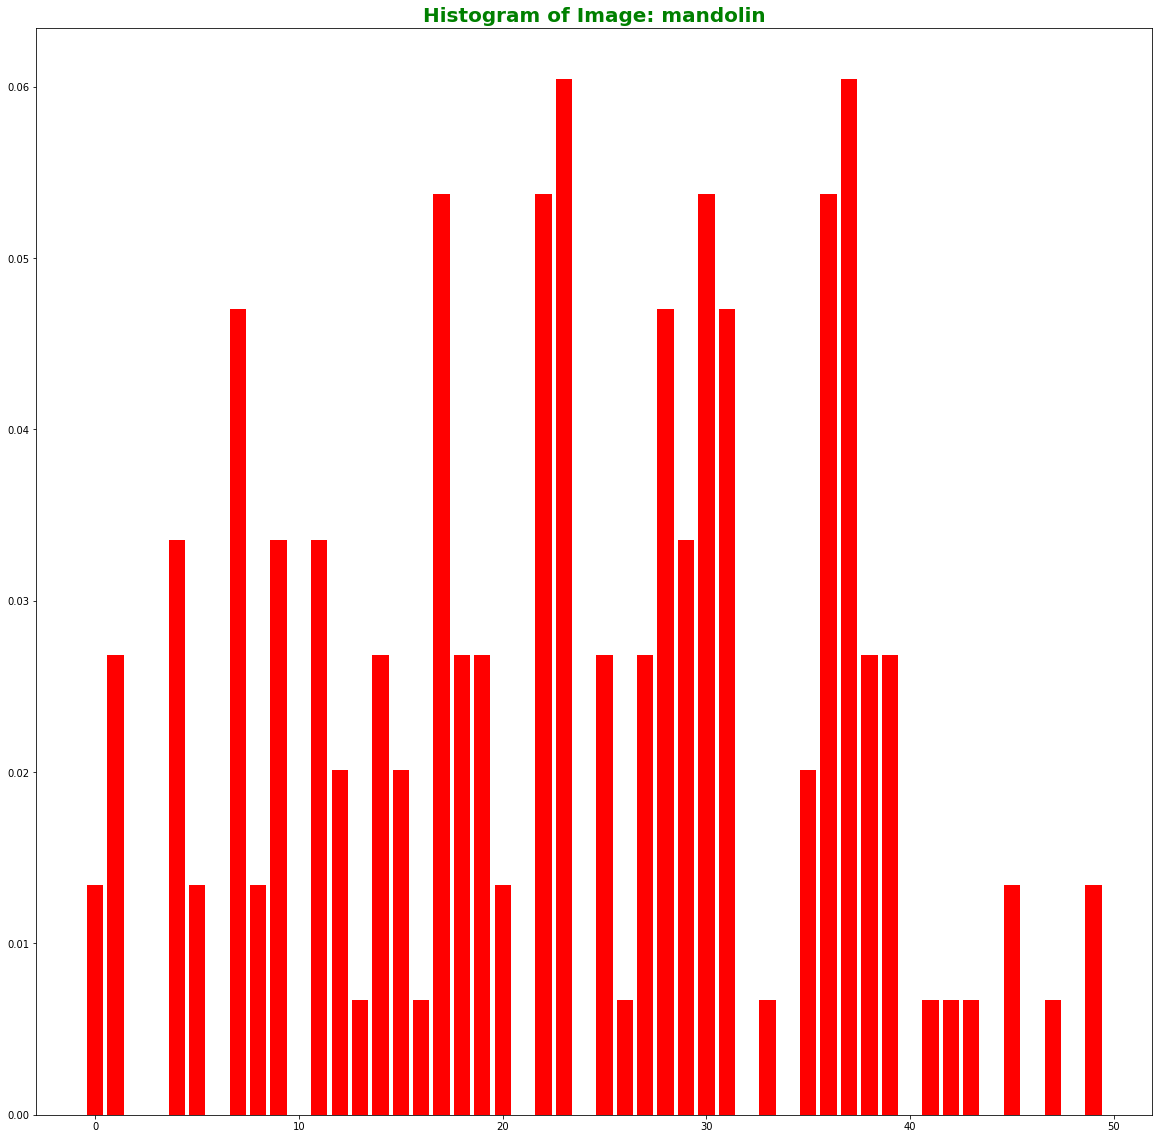

done


In [20]:
import cv2
from matplotlib import pyplot as plt
import os
from collections import defaultdict
import numpy as np
import itertools
from scipy.cluster.vq import vq,kmeans2
from random import shuffle



class bWords:
    DEBUG = True
    SKIPIMPORT = False  # Means to only import a minimal ammount of images
    IMAGES = defaultdict()
    outImages = []
    FONT_SIZE = 20

    def resizeImage(self, image, dbug=DEBUG):
        if dbug:
            image = cv2.resize(image, (120, 160))
        else:
            image = cv2.resize(image, (2400, 1200))
        return image

    def displayImage(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.title(img[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
        plt.imshow(img[0])

        plt.imshow(img)

    def displayImages(self, images):
        print("Displaying outs")
        for im in images:
            ima = im[0]
            ima = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.title(im[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
            plt.imshow(ima)

    def importImages(self, path):
        # for each category, we need to get all the pictures associated with it
        categories = [i[0] for i in os.walk(path)][1:]
        categories = categories[int(len(categories) / 2):]
        cs = [i.rsplit('/', 1)[1] for i in categories]

        # Create a dictionary where we have category as dict key, returning the array of related images
        for i in range(len(categories)):
            imNames = [j[2] for j in os.walk(categories[i] + "/")][0]
            if self.SKIPIMPORT and len(imNames):
                # No point importing ALL PICTURES when testing...
                if (i % 2 == 0 or i % 5 == 0):
                    continue
                imNames = imNames[:2]

            print ("\t importing: " + "(" + str(len(imNames)) + ") " + str(cs[i]) + ":"),
            importedImages = []
            for idx, image in enumerate(imNames):
                if (idx % 10 == 0):
                    print ('.'),
                # import each image and categorize it
                im = cv2.imread(categories[i] + "/" + image)
                # Resize each image for your sanity
                im = self.resizeImage(im)

                # Compute the sift features for each image
                s = cv2.xfeatures2d.SIFT_create()
                sifts = s.detectAndCompute(im, None)[1]

                #Then run k means on the imported images features
                try:
                    kmCentroids,kmClusters = kmeans2(sifts,50)
                except Exception:
                    continue
                #Then create a histogram based off of each cluster
                hist,bin_edges = np.histogram(kmClusters,50,normed=True)

                # #Normalize the histogram
                # hist = hist/50

                # Append imported images to list
                imageAndFeatures = dict({'image': im, 'hist': hist,'bin_edges':bin_edges})
                importedImages.append(imageAndFeatures)
            print ""
            self.IMAGES[cs[i]] = importedImages

    def main(self):
        pathToImages = "./images/101_ObjectCategories"

        print "Importing the images and run the kmeans algorithm"
        self.importImages(pathToImages)

        print "displaying images"
        # pick 2 random categories
        categories = [i for i in self.IMAGES]
        shuffle(categories)
        categories = categories[3:5]

        for i in categories:
            ims = self.IMAGES[i]
            ims = ims[:5]
            for image in ims:
                #first get the raw image and histogram data
                img,hist,bin_edges = image['image'],image['hist'],image['bin_edges']
                #plot the raw image
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure()
                plt.title("Image of Category: "+str(i), fontsize=self.FONT_SIZE, fontweight='bold', color="green")
                plt.imshow(img)

                #Then plot the histogram
                fig,ax = plt.subplots()
                ax.bar(range(50),hist,width=0.8,color='r')
                plt.title("Histogram of Image: " + str(i), fontsize=self.FONT_SIZE, fontweight='bold', color="green")
                plt.show()
                # plt.savefig("./images/histograms/temp.png")



        print "done"


%pylab
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20.0)
b = bWords()
b.main()


# Optical Flow

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
Displaying outs


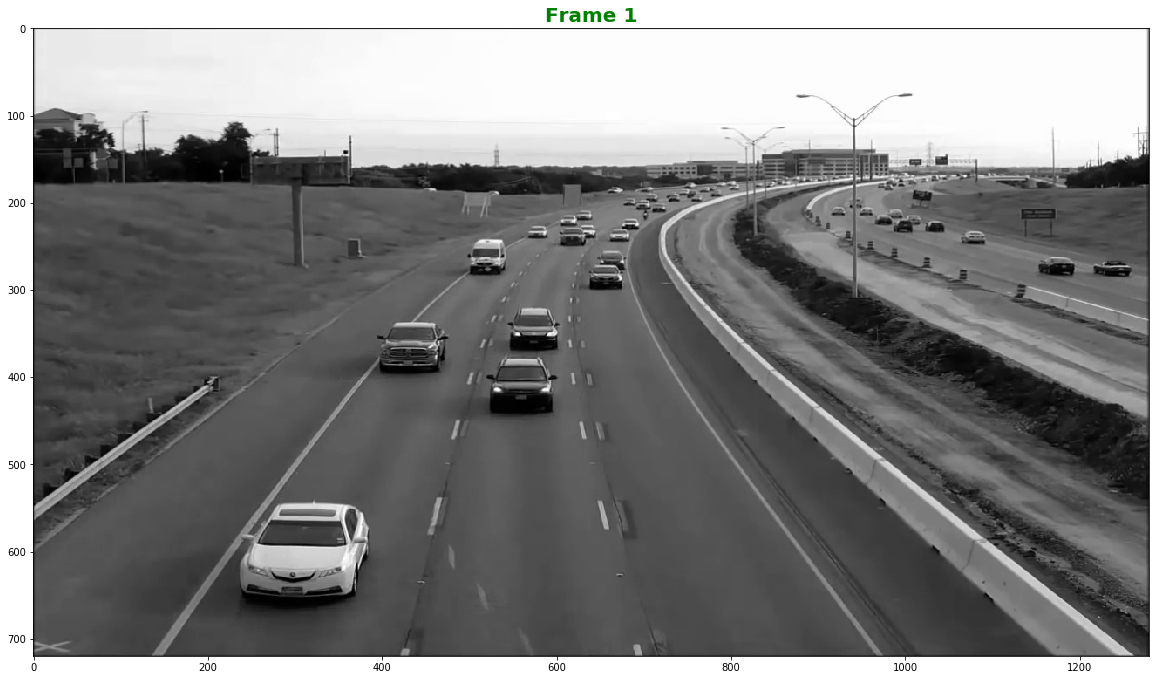

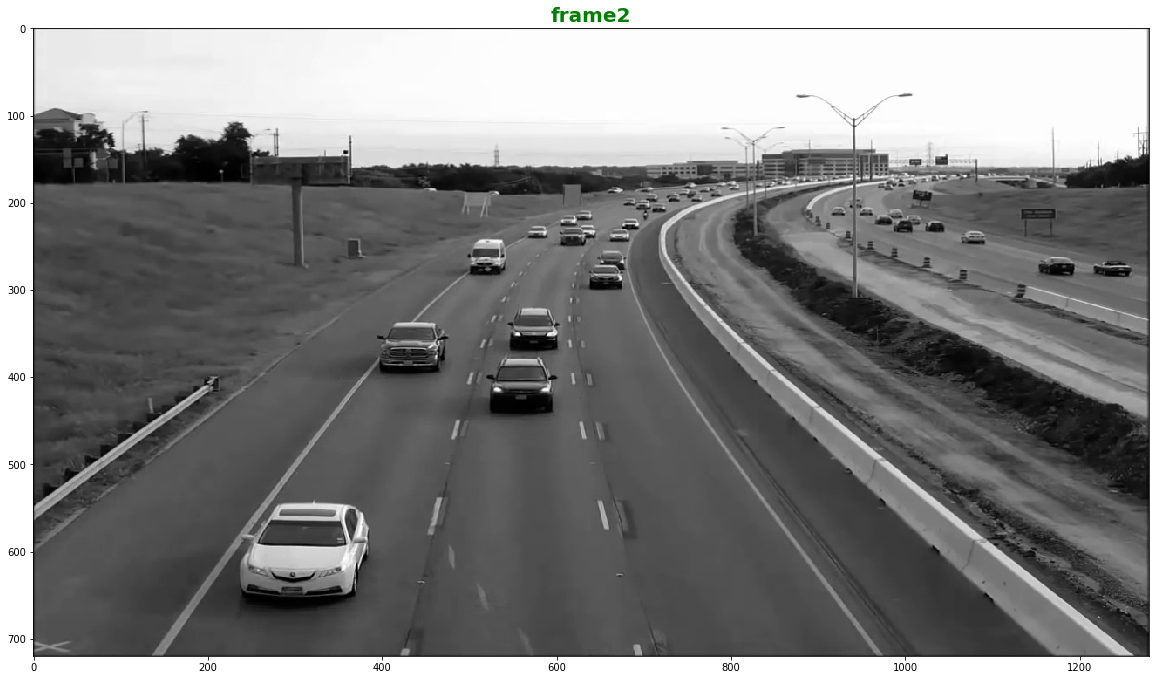

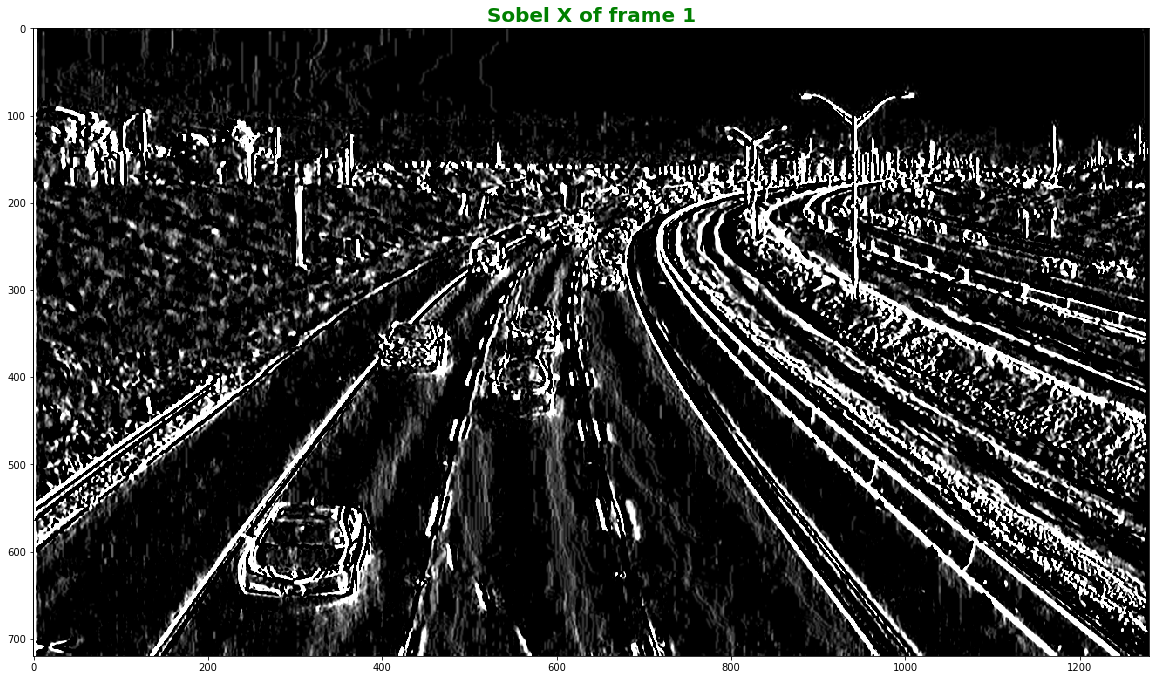

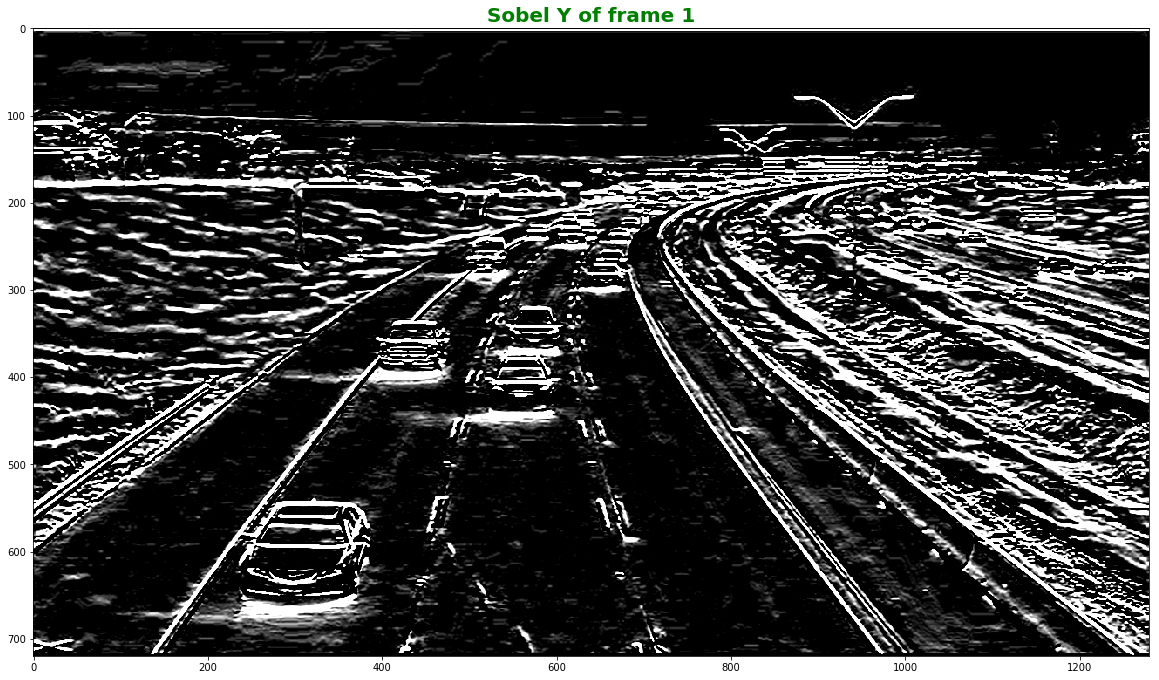

In [6]:
import cv2
from matplotlib import pyplot as plt
import os
from collections import defaultdict
import numpy as np
import itertools
from scipy.cluster.vq import vq, kmeans2
from random import shuffle

class Vector:
    def __init__(self,x,y):
        self.x = x
        self.y = y




class opticalFlow:
    DEBUG = True
    SKIPIMPORT = False  # Means to only import a minimal ammount of images
    IMAGES = defaultdict()
    outImages = []
    FONT_SIZE = 20

    def resizeImage(self, image, dbug=DEBUG):
        if dbug:
            image = cv2.resize(image, (120, 160))
        else:
            image = cv2.resize(image, (2400, 1200))
        return image

    def displayImage(self, img):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.figure()
        plt.title(img[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
        plt.imshow(img[0])

        plt.imshow(img)

    def displayImages(self, images):
        print("Displaying outs")
        for im in images:
            ima = im[0]
            if len(list(ima.shape))<3:
                ima = cv2.cvtColor(ima,cv2.COLOR_GRAY2RGB)
            else:
                ima = cv2.cvtColor(ima, cv2.COLOR_BGR2RGB)
            plt.figure()
            plt.title(im[1], fontsize=self.FONT_SIZE, fontweight='bold', color="green")
            plt.imshow(ima)

    def main(self):
        #First upload both images, in grey and colour
        im1,im2 = cv2.imread("./images/flow_images/frame1.jpg",0),cv2.imread("./images/flow_images/frame1.jpg",0)
        im1_clr, im2_clr = cv2.imread("./images/flow_images/frame1.jpg"), cv2.imread("./images/flow_images/frame1.jpg")
        self.outImages.append((im1,"Frame 1"))
        self.outImages.append((im2,"frame2"))

        #Then find the X and Y derivatives of the image
        im1_x, im1_y = cv2.Sobel(im1,cv2.CV_8U,1,0,ksize=5), cv2.Sobel(im1,cv2.CV_8U,0,1,ksize=5)
        im2_x, im2_y = cv2.Sobel(im2,cv2.CV_8U, 1, 0, ksize=5), cv2.Sobel(im1,cv2.CV_8U, 0, 1, ksize=5)
        self.outImages.append((im1_x,"Sobel X of frame 1"))
        self.outImages.append((im1_y, "Sobel Y of frame 1"))

        self.displayImages(self.outImages)
%pylab
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 20.0)
b = opticalFlow()
b.main()
